In [1]:
# Importing libraries
import os
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from colors import Color as c
import svm # Our Implementation of Support Vector Machine
from svm import BinarySVM, MultiSVM
from sklearn.svm import SVC # Sklearn's SVM
# set random seed
np.random.seed(42)

In [2]:
# Importing Data
X_train_binary, X_test_binary, y_train_binary, y_test_binary, X_train_multi, X_test_multi, y_train_multi, y_test_multi = svm.load_data(binaryClasses=['cp', 'im'])

Loading Data...
test_size:  0.2
random_state:  42


Class Frequency:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64

Multi-class Dataset:
X_train_multi shape:  (268, 7)
y_train_multi shape:  (268,)
X_test_multi shape:  (68, 7)
y_test_multi shape:  (68,)

Binary-class Dataset:
X_train_binary shape:  (176, 7)
y_train_binary shape:  (176,)
X_test_binary shape:  (44, 7)
y_test_binary shape:  (44,)


In [3]:
table, parameters = svm.runTests(X_train_binary, X_test_binary, y_train_binary, y_test_binary, X_train_multi, X_test_multi, y_train_multi, y_test_multi, runs=10)

Running Tests...


In [4]:
display(parameters)
display(table)

,runs,C,max_iter,tol,gamma,r,degree,binary_classes
0,10,1.0,1000,0.001,1,1,3,"[cp, im]"


,Classifier,Implementation,Kernel,Average Accuracy,Average Runtime
0,Binary,sklearn,linear,1.00000,0.00119
1,Binary,custom,linear,0.99318,0.00719
2,Binary,sklearn,sigmoid,0.68180,0.00069
3,Binary,custom,sigmoid,0.95908,0.05421
4,Binary,sklearn,rbf,1.00000,0.00034
5,Binary,custom,rbf,0.99546,0.00773
6,Binary,sklearn,poly,1.00000,0.00035
7,Binary,custom,poly,0.95909,0.00926
8,Multi,sklearn,linear,0.77940,0.00094
9,Multi,custom,linear,0.81762,0.13374


In [6]:
# save table to csv
table.to_csv('results.csv')

In [51]:
def convert_classes_to_int_manual(y):
    labels = np.unique(y)
    for i in range(len(labels)):
        y[y == labels[i]] = i
    return y.astype(int)
def plot_decision_boundary(XY, y, ax=None, kernel='linear', classifier='binary'):
    model = SVC(C=1, kernel=kernel, gamma=10, degree=2)
    model.fit(XY, y)
    y = y.reset_index(drop=True)
    y = convert_classes_to_int_manual(y)
    if ax is None:
        ax = plt.gca()

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = XY[:, 0].min() - 1, XY[:, 0].max() + 1
    y_min, y_max = XY[:, 1].min() - 1, XY[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Z = convert_classes_to_int_manual(Z)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    ax.scatter(XY[:, 0], XY[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlim(XY[:, 0].min() - 1, XY[:, 0].max() + 1)
    ax.set_ylim(XY[:, 1].min() - 1, XY[:, 1].max() + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title('Decision boundary for ' + classifier + ' SVM with ' + kernel + ' kernel')
    return ax

In [8]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary, X_train_multi, X_test_multi, y_train_multi, y_test_multi = svm.load_data(log=True, binaryClasses=['cp', 'om'], reduce=True)

Loading Data...
test_size:  0.2
random_state:  42


Class Frequency:
class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64

Multi-class Dataset:
X_train_multi shape:  (268, 2)
y_train_multi shape:  (268,)
X_test_multi shape:  (68, 2)
y_test_multi shape:  (68,)

Binary-class Dataset:
X_train_binary shape:  (130, 2)
y_train_binary shape:  (130,)
X_test_binary shape:  (33, 2)
y_test_binary shape:  (33,)


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=3)
grid_linear.fit(X_train_binary, y_train_binary)
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid, refit=True, verbose=3)
grid_poly.fit(X_train_binary, y_train_binary)
grid_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), param_grid, refit=True, verbose=3)
grid_sigmoid.fit(X_train_binary, y_train_binary)
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=3)
grid_rbf.fit(X_train_binary, y_train_binary)
print(grid_linear.best_params_)
print(grid_poly.best_params_)
print(grid_sigmoid.best_params_)
print(grid_rbf.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END ..........C=0.1, degree=2, gamma=1;, score=0.885 total time=   0.0s
[CV 2/5] END ..........C=0.1, degree=2, gamma=1;, score=0.885 total time=   0.0s
[CV 3/5] END ..........C=0.1, degree=2, gamma=1;, score=0.885 total time=   0.0s
[CV 4/5] END ..........C=0.1, degree=2, gamma=1;, score=0.885 total time=   0.0s
[CV 5/5] END ..........C=0.1, degree=2, gamma=1;, score=0.885 total time=   0.0s
[CV 1/5] END ........C=0.1, degree=2, gamma=0.1;, score=0.885 total time=   0.0s
[CV 2/5] END ........C=0.1, degree=2, gamma=0.1;, score=0.885 total time=   0.0s
[CV 3/5] END ........C=0.1, degree=2, gamma=0.1;, score=0.885 total time=   0.0s
[CV 4/5] END ........C=0.1, degree=2, gamma=0.1;, score=0.885 total time=   0.0s
[CV 5/5] END ........C=0.1, degree=2, gamma=0.1;, score=0.885 total time=   0.0s
[CV 1/5] END .......C=0.1, degree=2, gamma=0.01;, score=0.885 total time=   0.0s
[CV 2/5] END .......C=0.1, degree=2, gamma=0.0

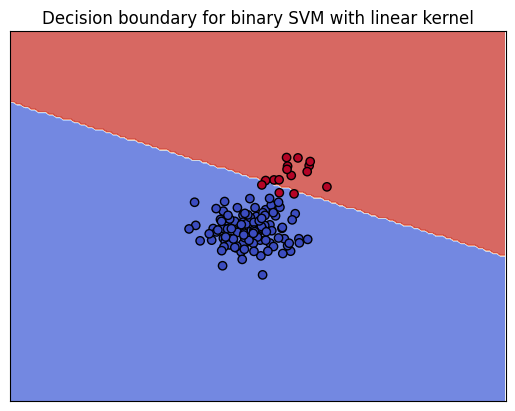

In [58]:
ax = plot_decision_boundary(X_train_binary, y_train_binary, kernel='linear', classifier='binary')
plt.savefig('Paper/plots/linear_binary.png')
plt.show()

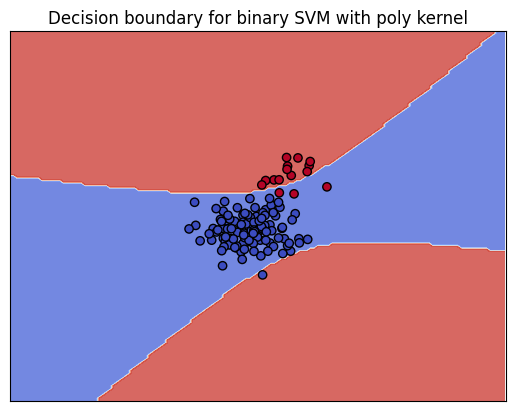

In [61]:
ax = plot_decision_boundary(X_train_binary, y_train_binary, kernel='poly', classifier='binary')
plt.savefig('Paper/plots/poly_binary.png')
plt.show()

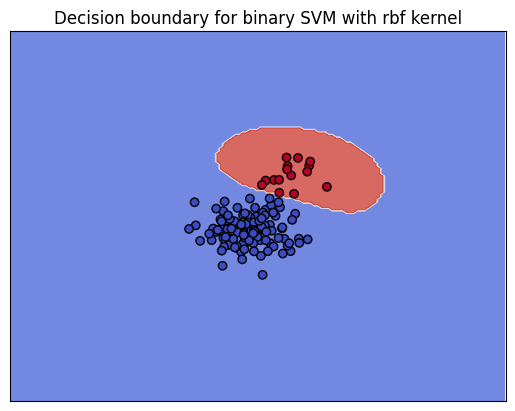

In [60]:
ax = plot_decision_boundary(X_train_binary, y_train_binary, kernel='rbf', classifier='binary')
plt.savefig('Paper/plots/rbf_binary.png')
plt.show()

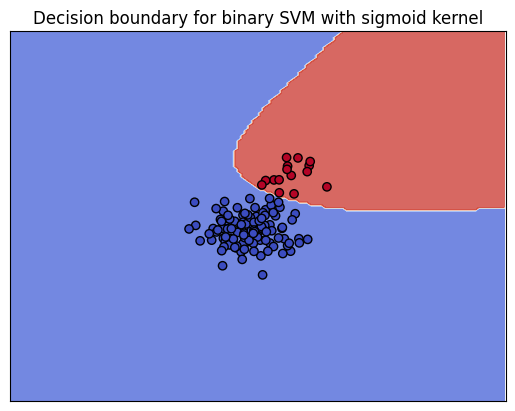

In [63]:
ax = plot_decision_boundary(X_train_binary, y_train_binary, kernel='sigmoid', classifier='binary')
plt.savefig('Paper/plots/sigmoid_binary.png')
plt.show()

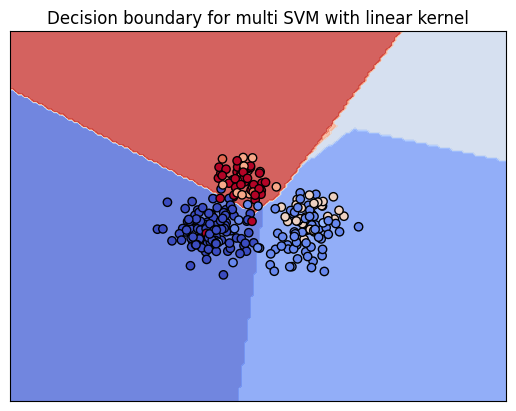

In [62]:
ax = plot_decision_boundary(X_train_multi, y_train_multi, kernel='linear', classifier='multi')
plt.savefig('Paper/plots/linear_multi.png')
plt.show()

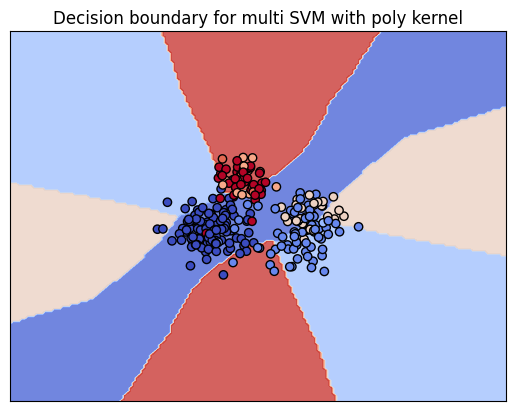

In [55]:
ax = plot_decision_boundary(X_train_multi, y_train_multi, kernel='poly', classifier='multi')
plt.savefig('Paper/plots/poly_multi.png')
plt.show()

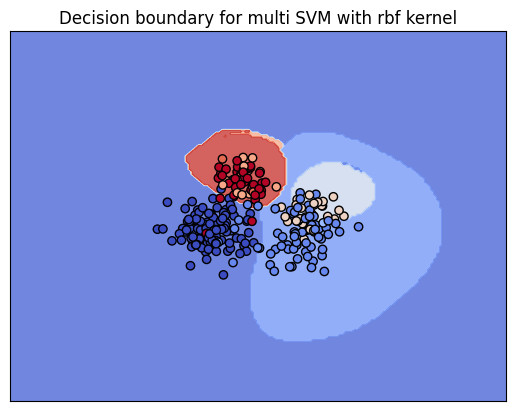

In [56]:
ax = plot_decision_boundary(X_train_multi, y_train_multi, kernel='rbf', classifier='multi')
plt.savefig('Paper/plots/rbf_multi.png')
plt.show()

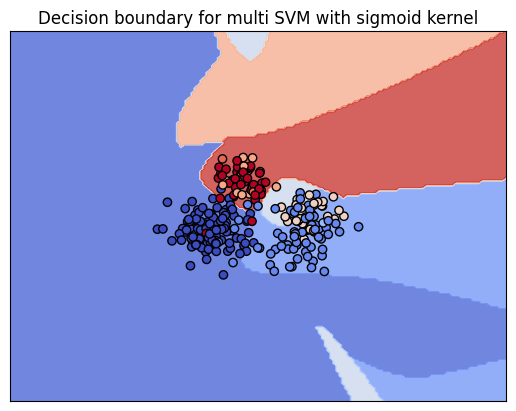

In [57]:
ax = plot_decision_boundary(X_train_multi, y_train_multi, kernel='sigmoid', classifier='multi')
plt.savefig('Paper/plots/sigmoid_multi.png')
plt.show()